Traffic Sign Classification Model1_30x30.h5(Model 2)

Model Accuracy on test data : *52.01%*

Model.h5 - Model Trained on 64 x 64 image shape
Model1_30X30.h5 - Model trained on 30 X 30 image shape. 

Playing with Filter Size in this model

Image size is 30 X 30. Filter earlier was 32. 

- Changed the filter size on both the Convolution operation to 16. 

Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imutils import paths
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout 

(30, 29, 3)


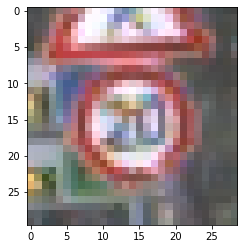

In [2]:
# Checking the shape of the original image
image = cv2.imread('C:\\Users\\Jatin Dhall\\Downloads\\archive\\Train\\0\\00000_00000_00000 (2).png')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
# img = cv2.resize(image, (1000,1000))
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
print(image.shape)

Loading the Image Data

In [3]:
imagePaths = list(paths.list_images("./Train"))

data = []
labels = []

count = 0
# Loop over the image paths
for imagePath in imagePaths:
  # Extract the class label from the fileName, load the image, and resize it to be a fixed 64 X 64 pixels
  label = imagePath.split(os.path.sep)[-2]
  image = cv2.imread(imagePath)
  image = cv2.resize(image,(30,30))

  print("Loading data : ",count)
  count+=1

  # Update the data and labels lists, respectively
  data.append(image)
  labels.append(label)


Loading data :  0
Loading data :  1
Loading data :  2
Loading data :  3
Loading data :  4
Loading data :  5
Loading data :  6
Loading data :  7
Loading data :  8
Loading data :  9
Loading data :  10
Loading data :  11
Loading data :  12
Loading data :  13
Loading data :  14
Loading data :  15
Loading data :  16
Loading data :  17
Loading data :  18
Loading data :  19
Loading data :  20
Loading data :  21
Loading data :  22
Loading data :  23
Loading data :  24
Loading data :  25
Loading data :  26
Loading data :  27
Loading data :  28
Loading data :  29
Loading data :  30
Loading data :  31
Loading data :  32
Loading data :  33
Loading data :  34
Loading data :  35
Loading data :  36
Loading data :  37
Loading data :  38
Loading data :  39
Loading data :  40
Loading data :  41
Loading data :  42
Loading data :  43
Loading data :  44
Loading data :  45
Loading data :  46
Loading data :  47
Loading data :  48
Loading data :  49
Loading data :  50
Loading data :  51
Loading data :  52
Loa

Converting lists into numpy arrays

In [4]:
data = np.array(data)
labels = np.array(labels)

print(data)
print(labels)

[[[[ 80  78  75]
   [ 78  76  74]
   [ 83  86  85]
   ...
   [ 74  74  68]
   [ 68  69  65]
   [ 66  67  66]]

  [[ 86  84  83]
   [ 82  80  80]
   [ 84  88  89]
   ...
   [ 78  77  73]
   [ 75  78  76]
   [ 78  80  80]]

  [[ 80  78  78]
   [ 86  85  86]
   [ 91  90  92]
   ...
   [ 72  74  72]
   [ 69  74  73]
   [ 74  78  78]]

  ...

  [[139 134 133]
   [132 127 123]
   [125 122 113]
   ...
   [ 89  94  94]
   [ 91  98  97]
   [ 99 103  99]]

  [[ 99  95  91]
   [103  98  91]
   [ 90  86  75]
   ...
   [ 96 102 104]
   [104 113 109]
   [ 98 104  96]]

  [[ 87  84  85]
   [106 100  95]
   [ 81  76  64]
   ...
   [ 95 102 102]
   [ 90 102  99]
   [ 89  97  90]]]


 [[[ 80  78  75]
   [ 78  76  74]
   [ 83  86  85]
   ...
   [ 74  74  68]
   [ 68  69  65]
   [ 66  67  66]]

  [[ 86  84  83]
   [ 82  80  80]
   [ 84  88  89]
   ...
   [ 78  77  73]
   [ 75  78  76]
   [ 78  80  80]]

  [[ 80  78  78]
   [ 86  85  86]
   [ 91  90  92]
   ...
   [ 72  74  72]
   [ 69  74  73]
   [ 74  78

Save the data and label

In [23]:
np.save('./data_array',data)
np.save('./labels_array',labels)

Loading the data and label

In [5]:
data = np.load('./data_array.npy')
labels = np.load('./labels_array.npy')

Checking the image and labels

(30, 30, 3)
0


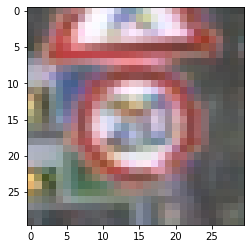

In [6]:
img = data[0]
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

print(img.shape)

print(labels[0])

In [7]:
print(data.shape , labels.shape)

(78418, 30, 30, 3) (78418,)


Train, Test Split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size = 0.2, random_state=0)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


Converting labels to OneHotEncoding

In [9]:
Y_train = to_categorical(Y_train,43)
Y_test = to_categorical(Y_test,43)

print(Y_train)
print(Y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Now we build the CNN model

In [10]:
model = Sequential()

Convolution and Max Pooling Layer

In [11]:
model.add(Conv2D(filters = 16,kernel_size = 3,activation='relu', input_shape = [30,30,3]))
model.add(MaxPool2D(pool_size=2,strides=2))

Second Conolution and Max Pooling Layer

In [12]:
model.add(Conv2D(filters = 16, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides = 2))

Flattening

In [13]:
model.add(Flatten())

Fully Connected Layers

In [14]:
model.add(Dense(units = 128, activation = 'relu'))

Output Layer

In [15]:
# We have 43 classes.
model.add(Dense(units = 43, activation = 'softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [17]:
epochs = 20
history = model.fit(X_train, Y_train, batch_size = 32, epochs = epochs, validation_data = (X_test, Y_test))

Epoch 1/20
1961/1961 [==============================] - 35s 18ms/step - loss: 1.2188 - accuracy: 0.7304 - val_loss: 0.4295 - val_accuracy: 0.8745
Epoch 2/20
1961/1961 [==============================] - 32s 16ms/step - loss: 0.2536 - accuracy: 0.9312 - val_loss: 0.1734 - val_accuracy: 0.9529
Epoch 3/20
1961/1961 [==============================] - 33s 17ms/step - loss: 0.1489 - accuracy: 0.9595 - val_loss: 0.1634 - val_accuracy: 0.9603
Epoch 4/20
1961/1961 [==============================] - 31s 16ms/step - loss: 0.1261 - accuracy: 0.9675 - val_loss: 0.1693 - val_accuracy: 0.9573
Epoch 5/20
1961/1961 [==============================] - 31s 16ms/step - loss: 0.1118 - accuracy: 0.9722 - val_loss: 0.1163 - val_accuracy: 0.9723
Epoch 6/20
1961/1961 [==============================] - 31s 16ms/step - loss: 0.0893 - accuracy: 0.9770 - val_loss: 0.1006 - val_accuracy: 0.9758
Epoch 7/20
1961/1961 [==============================] - 33s 17ms/step - loss: 0.0860 - accuracy: 0.9805 - val_loss: 0.0892 -

Save the model

In [18]:
model.save("./Model1_30X30_1.h5")

Load the Model

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               7

In [52]:
from keras.models import load_model
model = load_model("./Model1_30X30_1.h5") 

Defining the class labels(Texts)

In [20]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Vehicle > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing vehicle > 3.5 tons' }

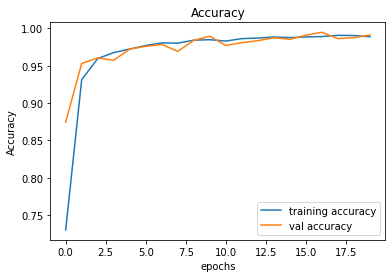

In [21]:
#Accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'] , label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

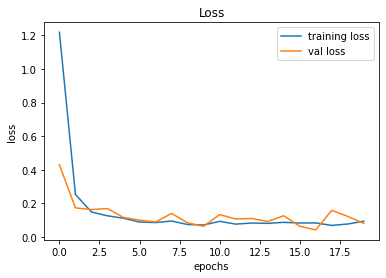

In [22]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Testing

Extracting Test Images

In [23]:
csv = pd.read_csv("./Test.csv")

label = csv["ClassId"].values
imgs = csv["Path"].values
data = []

# print(label)
print(imgs)

count = 0
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    count+=1

X_test = np.array(data)
print(count)
print(X_test)

['Test/00000.png' 'Test/00001.png' 'Test/00002.png' ... 'Test/12627.png'
 'Test/12628.png' 'Test/12629.png']
12630
[[[[116 140 175]
   [116 138 171]
   [119 138 173]
   ...
   [102 119 150]
   [101 122 149]
   [ 93 112 139]]

  [[116 142 177]
   [116 141 175]
   [117 141 174]
   ...
   [120 143 178]
   [122 144 176]
   [122 142 174]]

  [[118 142 174]
   [116 141 175]
   [114 140 172]
   ...
   [121 144 181]
   [122 144 180]
   [119 142 178]]

  ...

  [[117 137 168]
   [115 135 165]
   [116 135 164]
   ...
   [116 138 170]
   [116 136 168]
   [118 139 171]]

  [[116 136 166]
   [115 134 167]
   [115 133 165]
   ...
   [114 135 168]
   [116 136 166]
   [115 139 167]]

  [[112 135 166]
   [111 134 165]
   [119 135 166]
   ...
   [115 137 166]
   [117 138 167]
   [114 140 170]]]


 [[[ 62  72  61]
   [ 89  81  63]
   [ 94  82  65]
   ...
   [ 78  64  68]
   [ 72  65  67]
   [ 74  68  68]]

  [[ 64  72  60]
   [ 97  83  65]
   [ 97  81  63]
   ...
   [ 75  63  65]
   [ 93  69  71]
   [ 88

PREDICTION STEP

In [24]:
Y_Prediction = model.predict(x = X_test, steps=len(X_test), verbose = 1)
np.round(Y_Prediction)
print(Y_Prediction)

12630/12630 [==============================] - 21s 2ms/step
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0000000e+00 1.2010553e-38 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.1734928e-31 4.4698434e-22 6.4955879e-07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.6509226e-16 8.4290397e-09 2.0739231e-02 ... 5.3847526e-07
  5.5780240e-14 2.6825817e-09]
 [3.3007039e-10 2.0010198e-10 3.8092417e-06 ... 2.9225749e-08
  5.2060387e-16 1.2222138e-03]
 [3.3106762e-35 1.5739996e-32 5.0727241e-16 ... 6.1478451e-14
  3.6992840e-31 0.0000000e+00]]


Analyzing the prediction matrix

43
Prediction Matrix
[7.2375363e-21 2.1214885e-09 5.2152051e-15 3.2786903e-38 9.9738806e-01
 1.4156213e-03 0.0000000e+00 1.1963595e-03 3.2982054e-14 0.0000000e+00
 5.6498609e-28 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.2541552e-34 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 5.7230886e-37 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]
***Predicted class***
4
Speed limit (70km/h)
***Actual Class***
0
Speed limit (20km/h)


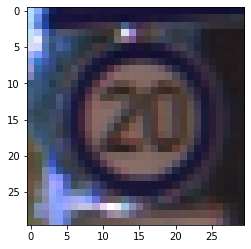

In [25]:
img_no = 243
img = X_test[img_no]
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
print(len(Y_Prediction[img_no]))
class_predicted = np.argmax(Y_Prediction[img_no])
print("Prediction Matrix")
print(Y_Prediction[img_no])
print("***Predicted class***")
print(class_predicted)
print(classes[class_predicted])
print("***Actual Class***")
print(label[img_no])
print(classes[label[img_no]])

Extracting classes from the prediction matrix for each test image

In [26]:
predicted_classes = []
for i in range(len(Y_Prediction)):
    predicted_classes.append(np.argmax(Y_Prediction[i]))

predicted_classes = np.array(predicted_classes)
print(predicted_classes)
print(label)

[16  1  5 ...  3  7 37]
[16  1 38 ...  6  7 10]


Accuracy Score Calculations

In [27]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, predicted_classes))

0.5201900237529691
